In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns

df_bb = pd.read_csv('./BB/metrics_all_folds.csv')
df_no = pd.read_csv('./noBB/metrics_all_folds.csv')

df_bb['BB'] = 'Yes'
df_no['BB'] = 'No'

df = pd.concat([df_bb, df_no])
df.sort_values(by='PatID', inplace=True)

df_sub = df[df['label'].isin(['Muscle', 'SC-Fat', 'IMAT'])]
df_sub

,PatID,Fold,label,dice,msd,hd95,BB
56,231,2,IMAT,0.817,0.921,6.007,No
54,231,2,Muscle,0.954,0.429,2.356,No
73,231,2,SC-Fat,0.895,1.041,2.634,Yes
74,231,2,IMAT,0.771,0.993,6.716,Yes
55,231,2,SC-Fat,0.888,1.128,3.003,No
...,...,...,...,...,...,...,...
37,312108,1,SC-Fat,0.948,1.092,3.003,No
38,312108,1,IMAT,0.751,0.815,5.178,No
36,312108,1,Muscle,0.925,0.565,2.634,No
48,312108,1,Muscle,0.927,0.537,2.499,Yes


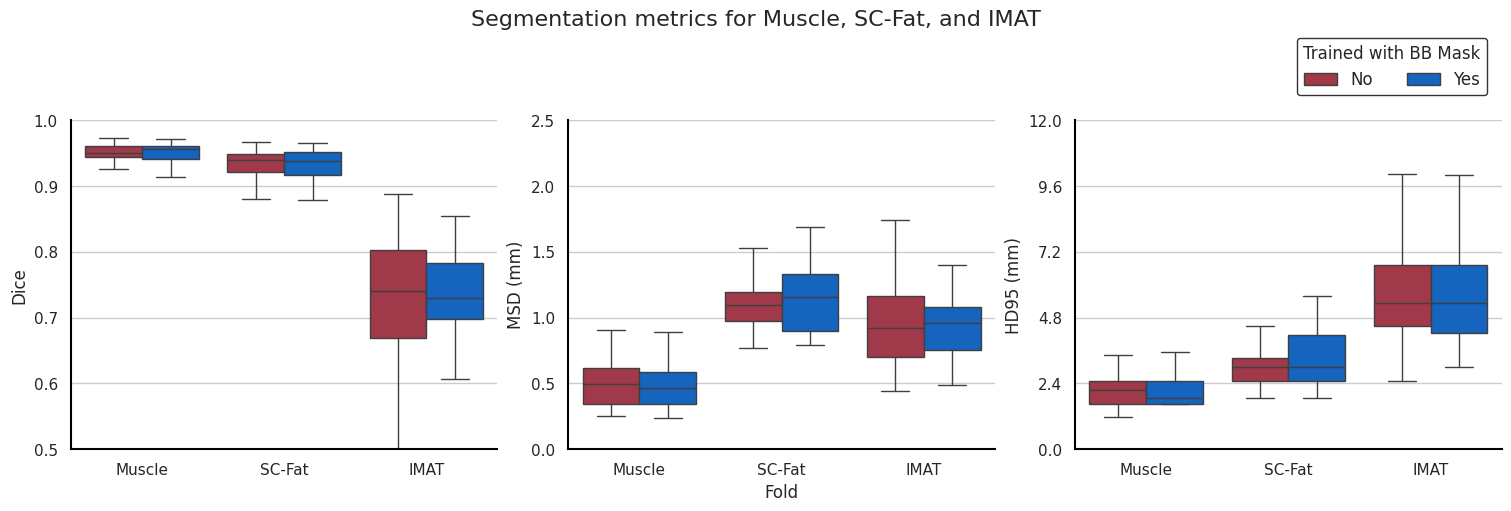

In [2]:
# boxplots of the metrics
cols_bb = {'Yes': '#0C63C6',
           'No': '#a63446'}

colors_bb = list(cols_bb.values())
custom_cmap = mcolors.ListedColormap(colors_bb)

sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
sns.boxplot(x='label', y='dice', hue='BB', data=df_sub, ax=ax[0], palette=cols_bb, showfliers=False, saturation=0.9, order=['Muscle', 'SC-Fat', 'IMAT'])
sns.boxplot(x='label', y='msd', hue='BB', data=df_sub, ax=ax[1], palette=cols_bb, showfliers=False, saturation=0.9, order=['Muscle', 'SC-Fat', 'IMAT'])
sns.boxplot(x='label', y='hd95', hue='BB', data=df_sub, ax=ax[2], palette=cols_bb, showfliers=False, saturation=0.9, order=['Muscle', 'SC-Fat', 'IMAT'])

plt.suptitle('Segmentation metrics for Muscle, SC-Fat, and IMAT', fontsize=16, horizontalalignment='center')
# make each plot have 5 y ticks
for i in range(3):
    yticks = np.linspace(0, ax[i].get_ylim()[1].round(0), 5)
    ax[i].set_yticks(yticks)
    ax[i].set_xlabel('')
    if i != 2:
        ax[i].legend().set_visible(False)
    else:
        ax[i].legend(title='Trained with BB Mask', loc='lower left', edgecolor='black', ncol=2, title_fontsize=12, fontsize=12, bbox_to_anchor=(0.5, 1.05))

    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')

    
ax[0].set_ylim(0.5, 1)
ax[0].set_yticks(np.linspace(0.5, 1, 6))
ax[0].set_ylabel('Dice')

ax[1].set_ylim(0, 2.5)
ax[1].set_yticks(np.linspace(0, 2.5, 6))
ax[1].set_ylabel('MSD (mm)')
ax[1].set_xlabel('Fold')

ax[2].set_ylim(0, 12)
ax[2].set_yticks(np.linspace(0, 12, 6))
ax[2].set_ylabel('HD95 (mm)')


plt.show()

/tmp/ipykernel_372453/2946761080.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


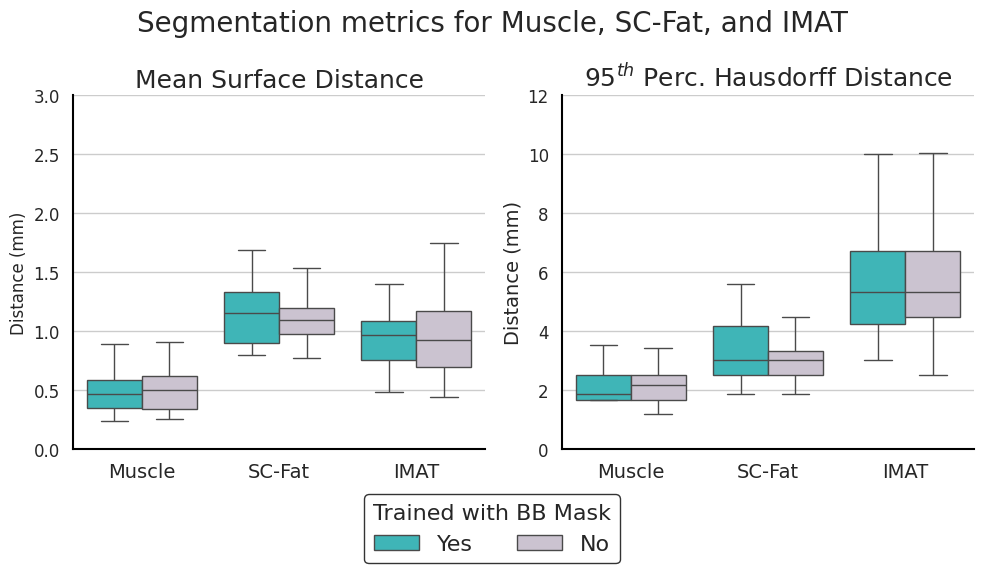

In [58]:
# boxplots of the metrics
cols_bb = {'Yes': '#25ced1',
           'No': '#cbc0d3'}

colors_bb = list(cols_bb.values())
custom_cmap = mcolors.ListedColormap(colors_bb)

sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
sns.boxplot(x='label', y='msd', hue='BB', data=df_sub, ax=ax[0], palette=cols_bb, hue_order=['Yes', 'No'],
             showfliers=False, saturation=0.7, order=['Muscle', 'SC-Fat', 'IMAT'])
sns.boxplot(x='label', y='hd95', hue='BB', data=df_sub, ax=ax[1], palette=cols_bb, hue_order=['Yes', 'No'],
            showfliers=False, saturation=0.7, order=['Muscle', 'SC-Fat', 'IMAT'])

plt.suptitle('Segmentation metrics for Muscle, SC-Fat, and IMAT', fontsize=20, horizontalalignment='center')
# make each plot have 5 y ticks
for i in range(2):
    ax[i].set_xlabel('')
    #ax[i].set_xticks(df_sub['label'].unique(), fontsize=14)
    ax[i].legend().set_visible(False)

    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')

ax[0].set_title('Mean Surface Distance', fontsize=18)
ax[0].set_ylim(0, 2)
ax[0].set_yticks(np.linspace(0, 3, 7))
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].set_ylabel('Distance (mm)')

ax[1].set_title(r'$95^{th}$ Perc. Hausdorff Distance', fontsize=18)
ax[1].set_yticks(np.linspace(0, 12, 7))
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].set_ylabel('Distance (mm)', fontsize=14)


# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Trained with BB Mask', loc='lower center', 
            edgecolor='black', ncol=2, title_fontsize=16, fontsize=16, 
            bbox_to_anchor=(0.5, -0.15), frameon=True)

plt.tight_layout()

plt.show()


/tmp/ipykernel_372453/2323705572.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels([f'{i+1}' for i in range(5)])
/tmp/ipykernel_372453/2323705572.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels([f'{i+1}' for i in range(5)])


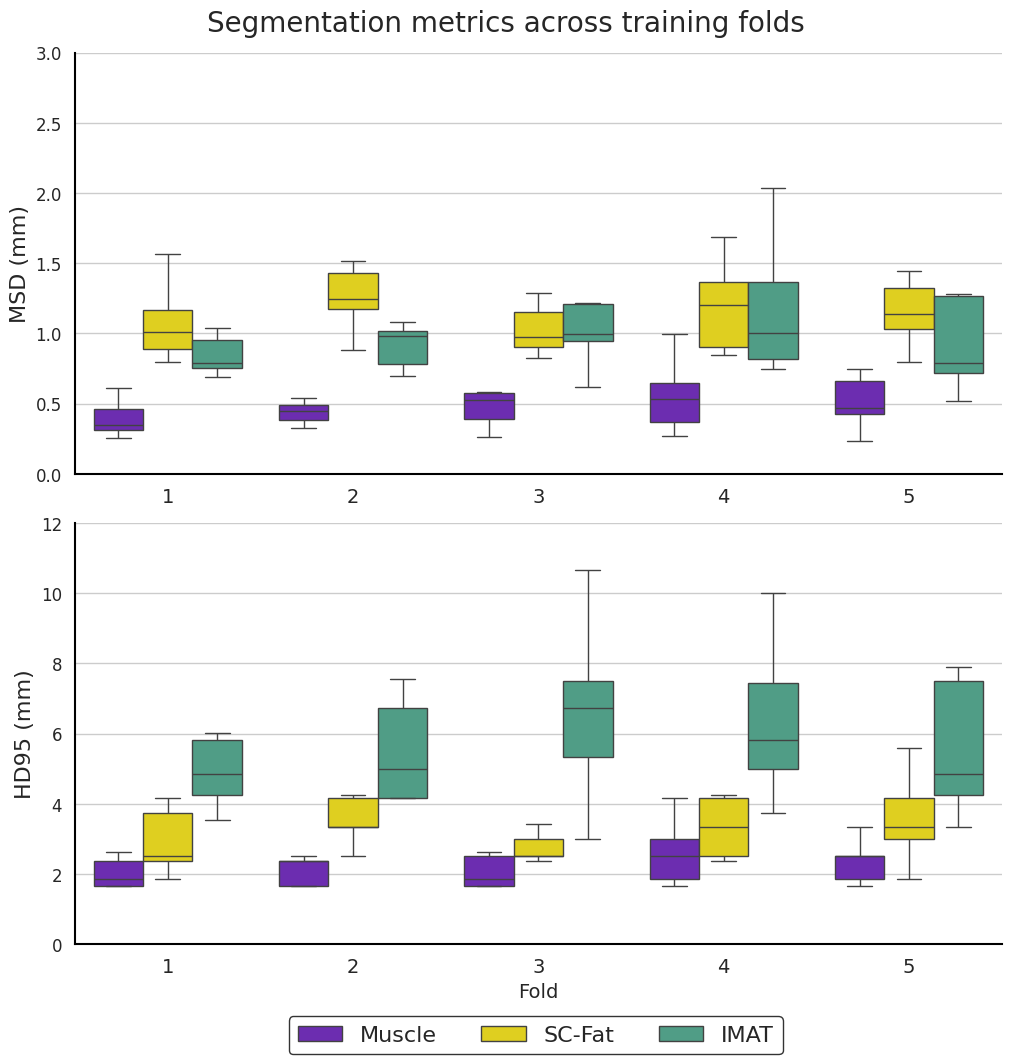

In [72]:
palette_rois = {'Muscle': '#6B17C6',
                'SC-Fat': '#ffe900',
                'IMAT': '#43AA8B'}

colors = list(palette_rois.values())
custom_cmap = mcolors.ListedColormap(colors)

df_bb = df_bb[df_bb['label'].isin(['Muscle', 'SC-Fat', 'IMAT'])]
metrics = ['msd', 'hd95']  # Removed 'dice'

# for each fold plot the metrics
fig, ax = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)

for i, metric in enumerate(metrics):
    sns.boxplot(x='Fold', y=metric, data=df_bb, ax=ax[i], hue='label', palette=palette_rois, showfliers=False)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels([f'{i+1}' for i in range(5)])

    ax[i].legend().set_visible(False)
        
        #ax[i].legend(edgecolor='black', ncol=3, fontsize=12, bbox_to_anchor=(1.05, 1))

    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')

ax[0].set_ylim(0, 2.5)
ax[0].set_yticks(np.linspace(0, 3, 7))
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].set_ylabel('MSD (mm)', fontsize=16)

ax[1].set_ylim(0, 10)
ax[1].set_yticks(np.linspace(0, 12, 7))
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].set_ylabel('HD95 (mm)', fontsize=16)
ax[1].set_xlabel('Fold', fontsize=14)

plt.suptitle('Segmentation metrics across training folds', fontsize=20, horizontalalignment='center')

# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', 
            edgecolor='black', ncol=3, title_fontsize=16, fontsize=16, 
            bbox_to_anchor=(0.53, -0.06), frameon=True)

plt.show()


/tmp/ipykernel_372453/2316334797.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels([f'{i+1}' for i in range(5)])
/tmp/ipykernel_372453/2316334797.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels([f'{i+1}' for i in range(5)])


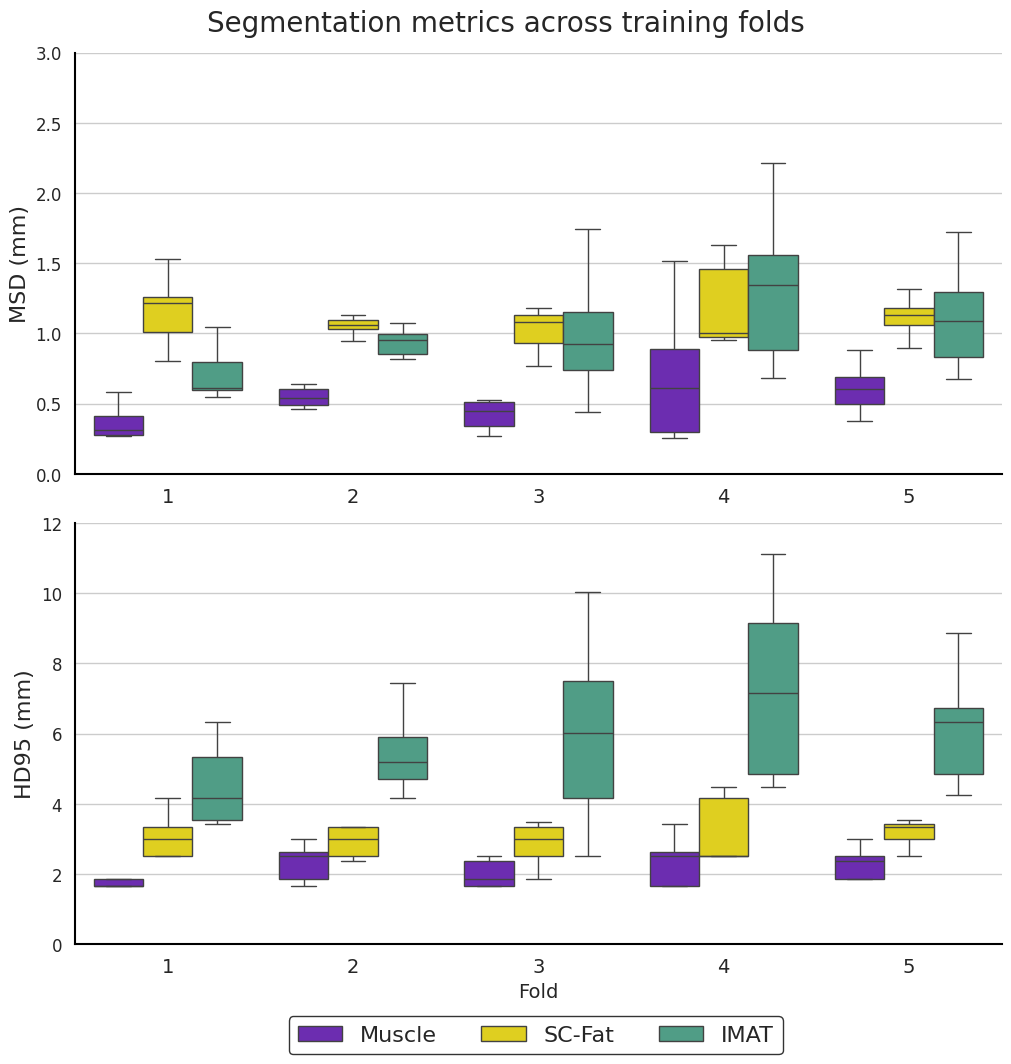

In [78]:
palette_rois = {'Muscle': '#6B17C6',
                'SC-Fat': '#ffe900',
                'IMAT': '#43AA8B'}

colors = list(palette_rois.values())
custom_cmap = mcolors.ListedColormap(colors)

df_bb = df_bb[df_bb['label'].isin(['Muscle', 'SC-Fat', 'IMAT'])]
metrics = ['msd', 'hd95']  # Removed 'dice'

# for each fold plot the metrics
fig, ax = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)

for i, metric in enumerate(metrics):
    sns.boxplot(x='Fold', y=metric, data=df_no, ax=ax[i], hue='label', palette=palette_rois,
                showfliers=False)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels([f'{i+1}' for i in range(5)])

    ax[i].legend().set_visible(False)
        
        #ax[i].legend(edgecolor='black', ncol=3, fontsize=12, bbox_to_anchor=(1.05, 1))

    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')

ax[0].set_ylim(0, 2.5)
ax[0].set_yticks(np.linspace(0, 3, 7))
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].set_ylabel('MSD (mm)', fontsize=16)

ax[1].set_ylim(0, 10)
ax[1].set_yticks(np.linspace(0, 12, 7))
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].set_ylabel('HD95 (mm)', fontsize=16)
ax[1].set_xlabel('Fold', fontsize=14)

plt.suptitle('Segmentation metrics across training folds', fontsize=20, horizontalalignment='center')

# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', 
            edgecolor='black', ncol=3, title_fontsize=16, fontsize=16, 
            bbox_to_anchor=(0.53, -0.06), frameon=True)

plt.show()


In [80]:
import pandas as pd
import numpy as np
from scipy.stats import sem, t

# Function to calculate 95% CI
def ci_95(x):
    n = len(x)
    mean = np.mean(x)
    std_err = sem(x)  # Standard error of the mean
    h = std_err * t.ppf((1 + 0.95) / 2, n - 1)  # Margin of error
    return (mean - h, mean + h)

In [95]:
# group by fold and get the mean and std of the metrics

df_bb_grouped = df_bb.groupby(['label', 'Fold']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_bb_grouped.columns = ['_'.join(col) for col in df_bb_grouped.columns]

# round the values
df_bb_grouped = df_bb_grouped.round(3)

# Split the ci_95 column into two separate columns for each metric
df_bb_grouped[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_bb_grouped['msd_ci_95'].tolist(), index=df_bb_grouped.index)
df_bb_grouped[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_bb_grouped['hd95_ci_95'].tolist(), index=df_bb_grouped.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_bb_grouped = df_bb_grouped.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_bb_grouped = df_bb_grouped.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_bb_grouped['msd_ci_95'] = list(zip(df_bb_grouped['msd_ci_95_lower'], df_bb_grouped['msd_ci_95_upper']))
df_bb_grouped['hd95_ci_95'] = list(zip(df_bb_grouped['hd95_ci_95_lower'], df_bb_grouped['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_bb_grouped = df_bb_grouped.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])
# reorder 
df_bb_grouped = df_bb_grouped[['msd_mean', 'msd_std', 'msd_ci_95', 'hd95_mean', 'hd95_std', 'hd95_ci_95']]


# Swap the index levels
df_bb_grouped = df_bb_grouped.swaplevel().sort_index()


df_bb_grouped.to_csv('bb_metrics-fold_ROI.csv')


df_bb_grouped

msd_mean  msd_std     msd_ci_95  hd95_mean  hd95_std  \
Fold label                                                          
0    IMAT        0.83     0.13  (0.74, 0.93)       4.89      0.87   
     Muscle      0.39     0.11   (0.3, 0.48)       1.99      0.36   
     SC-Fat      1.08     0.27  (0.87, 1.28)       2.86      0.85   
1    IMAT        0.91     0.15  (0.79, 1.02)       5.42      1.31   
     Muscle      0.61     0.55  (0.18, 1.04)       2.50      1.38   
     SC-Fat      1.35     0.37  (1.06, 1.63)       3.81      1.27   
2    IMAT        1.04     0.38  (0.74, 1.33)       6.51      2.29   
     Muscle      0.57     0.37  (0.29, 0.86)       2.73      2.14   
     SC-Fat      1.02     0.17  (0.89, 1.15)       2.71      0.36   
3    IMAT        1.14     0.41  (0.82, 1.46)       6.31      2.03   
     Muscle      0.57     0.25  (0.37, 0.76)       2.54      0.89   
     SC-Fat      1.27     0.43   (0.95, 1.6)       3.63      1.41   
4    IMAT        0.91     0.30  (0.68, 1.14)       5.40      1.80   
     Muscle      0.51     0.18  (0.37, 0.65)       2.28      0.56   
     SC-Fat      1.16     0.21   (1.0, 1.32)       3.57      1.10   

               hd95_ci_95  
Fold label                 
0    IMAT    (4.22, 5.56)  
     Muscle  (1.71, 2.27)  
     SC-Fat  (2.21, 3.51)  
1    IMAT    (4.41, 6.43)  
     Muscle  (1.44, 3.56)  
     SC-Fat  (2.83, 4.79)  
2    IMAT    (4.75, 8.27)  
     Muscle  (1.09, 4.37)  
     SC-Fat  (2.44, 2.99)  
3    IMAT    (4.75, 7.87)  
     Muscle  (1.86, 3.23)  
     SC-Fat  (2.55, 4.71)  
4    IMAT    (4.01, 6.78)  
     Muscle  (1.85, 2.71)  
     SC-Fat  (2.72, 4.41)

In [96]:
# get the avg of the metrics across all folds 
df_bb_avg = df_bb.groupby(['label']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_bb_avg.columns = ['_'.join(col) for col in df_bb_avg.columns]

# round the values
# Split the ci_95 column into two separate columns for each metric
df_bb_avg[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_bb_avg['msd_ci_95'].tolist(), index=df_bb_avg.index)

df_bb_avg[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_bb_avg['hd95_ci_95'].tolist(), index=df_bb_avg.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_bb_avg = df_bb_avg.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_bb_avg = df_bb_avg.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_bb_avg['msd_ci_95'] = list(zip(df_bb_avg['msd_ci_95_lower'], df_bb_avg['msd_ci_95_upper']))
df_bb_avg['hd95_ci_95'] = list(zip(df_bb_avg['hd95_ci_95_lower'], df_bb_avg['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_bb_avg = df_bb_avg.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])


# reorder
df_bb_avg = df_bb_avg[['msd_mean', 'msd_std', 'msd_ci_95', 'hd95_mean', 'hd95_std', 'hd95_ci_95']]

df_bb_avg.to_csv('bb_metrics-avg_ROI.csv')

df_bb_avg


,msd_mean,msd_std,msd_ci_95,hd95_mean,hd95_std,hd95_ci_95
label,,,,,,
IMAT,0.97,0.30,"(0.87, 1.06)",5.71,1.77,"(5.17, 6.24)"
Muscle,0.53,0.33,"(0.43, 0.63)",2.41,1.21,"(2.04, 2.77)"
SC-Fat,1.18,0.32,"(1.08, 1.27)",3.32,1.11,"(2.98, 3.65)"


In [97]:
# group by fold and get the mean and std of the metrics

df_no_grouped = df_no.groupby(['label', 'Fold']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_no_grouped.columns = ['_'.join(col) for col in df_no_grouped.columns]

# round the values
df_no_grouped = df_no_grouped.round(3)

# Split the ci_95 column into two separate columns for each metric
df_no_grouped[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_no_grouped['msd_ci_95'].tolist(), index=df_no_grouped.index)
df_no_grouped[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_no_grouped['hd95_ci_95'].tolist(), index=df_no_grouped.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_no_grouped = df_no_grouped.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_no_grouped = df_no_grouped.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_no_grouped['msd_ci_95'] = list(zip(df_no_grouped['msd_ci_95_lower'], df_no_grouped['msd_ci_95_upper']))
df_no_grouped['hd95_ci_95'] = list(zip(df_no_grouped['hd95_ci_95_lower'], df_no_grouped['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_no_grouped = df_no_grouped.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])
# reorder 
df_no_grouped = df_no_grouped[['msd_mean', 'msd_std', 'msd_ci_95', 'hd95_mean', 'hd95_std', 'hd95_ci_95']]


# Swap the index levels
df_no_grouped = df_no_grouped.swaplevel().sort_index()

df_no_grouped.to_csv('noBB_metrics-fold_ROI.csv')

df_no_grouped

msd_mean  msd_std     msd_ci_95  hd95_mean  hd95_std  \
Fold label                                                          
0    IMAT        0.74     0.22   (0.57, 0.9)       4.36      1.06   
     Muscle      0.36     0.10  (0.28, 0.44)       1.80      0.40   
     SC-Fat      1.16     0.22  (0.98, 1.33)       3.07      0.55   
1    IMAT        0.94     0.20  (0.79, 1.09)       5.42      1.08   
     Muscle      0.66     0.45   (0.32, 1.0)       2.50      0.76   
     SC-Fat      1.07     0.14  (0.97, 1.18)       2.87      0.41   
2    IMAT        0.98     0.40   (0.67, 1.3)       5.85      2.32   
     Muscle      0.53     0.37  (0.24, 0.81)       2.60      1.86   
     SC-Fat      1.02     0.14  (0.91, 1.13)       2.82      0.55   
3    IMAT        1.26     0.49  (0.89, 1.64)       7.24      2.52   
     Muscle      0.66     0.41  (0.35, 0.97)       2.47      0.88   
     SC-Fat      1.21     0.29  (0.98, 1.43)       3.19      0.87   
4    IMAT        1.11     0.39  (0.81, 1.41)       6.44      1.86   
     Muscle      0.61     0.17  (0.48, 0.74)       2.37      0.45   
     SC-Fat      1.11     0.12  (1.02, 1.21)       3.25      0.50   

               hd95_ci_95  
Fold label                 
0    IMAT    (3.55, 5.18)  
     Muscle   (1.5, 2.11)  
     SC-Fat  (2.65, 3.49)  
1    IMAT    (4.59, 6.25)  
     Muscle  (1.91, 3.09)  
     SC-Fat  (2.56, 3.19)  
2    IMAT    (4.07, 7.63)  
     Muscle  (1.17, 4.04)  
     SC-Fat   (2.4, 3.24)  
3    IMAT     (5.3, 9.18)  
     Muscle  (1.79, 3.14)  
     SC-Fat  (2.53, 3.86)  
4    IMAT    (5.01, 7.87)  
     Muscle  (2.02, 2.71)  
     SC-Fat  (2.87, 3.63)

In [98]:
# get the avg of the metrics across all folds 
df_no_avg = df_no.groupby(['label']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_no_avg.columns = ['_'.join(col) for col in df_no_avg.columns]

# round the values
# Split the ci_95 column into two separate columns for each metric
df_no_avg[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_no_avg['msd_ci_95'].tolist(), index=df_no_avg.index)

df_no_avg[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_no_avg['hd95_ci_95'].tolist(), index=df_no_avg.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_no_avg = df_no_avg.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_no_avg = df_no_avg.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_no_avg['msd_ci_95'] = list(zip(df_no_avg['msd_ci_95_lower'], df_no_avg['msd_ci_95_upper']))
df_no_avg['hd95_ci_95'] = list(zip(df_no_avg['hd95_ci_95_lower'], df_no_avg['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_no_avg = df_no_avg.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])


# reorder
df_no_avg = df_no_avg[['msd_mean', 'msd_std', 'msd_ci_95', 'hd95_mean', 'hd95_std', 'hd95_ci_95']]

df_no_avg.to_csv('noBB_metrics-avg_ROI.csv')

df_no_avg


,msd_mean,msd_std,msd_ci_95,hd95_mean,hd95_std,hd95_ci_95
label,,,,,,
IMAT,1.01,0.38,"(0.89, 1.12)",5.86,2.03,"(5.25, 6.48)"
Muscle,0.56,0.33,"(0.46, 0.66)",2.35,1.01,"(2.04, 2.65)"
SC-Fat,1.11,0.20,"(1.05, 1.17)",3.04,0.59,"(2.86, 3.22)"
